**MUSHROOMS CLASSIFICATION**

<a title="MichaelMaggs [CC BY-SA 2.5 (https://creativecommons.org/licenses/by-sa/2.5)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Amanita_muscaria_(fly_agaric).JPG"><img width="128" alt="Amanita muscaria (fly agaric)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Amanita_muscaria_%28fly_agaric%29.JPG/128px-Amanita_muscaria_%28fly_agaric%29.JPG"></a>


In this kernel we will investigate the mushrooms classification database.
Simple EDA and classification with logistic regression will be performed. Data for classification will be one-hot-encoded. Based on the analysis results features importance will be revealed. At the end we will see how the classfier will behave if we select few arbitrary selected variables (ROC will be plotted)

Reading necesary libraries. We will use [sklearn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/), [numpy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder


**Reading raw data from .csv file.**

In [2]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [3]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

**All columns are categorical. Let's explore them by looking at bar charts.**

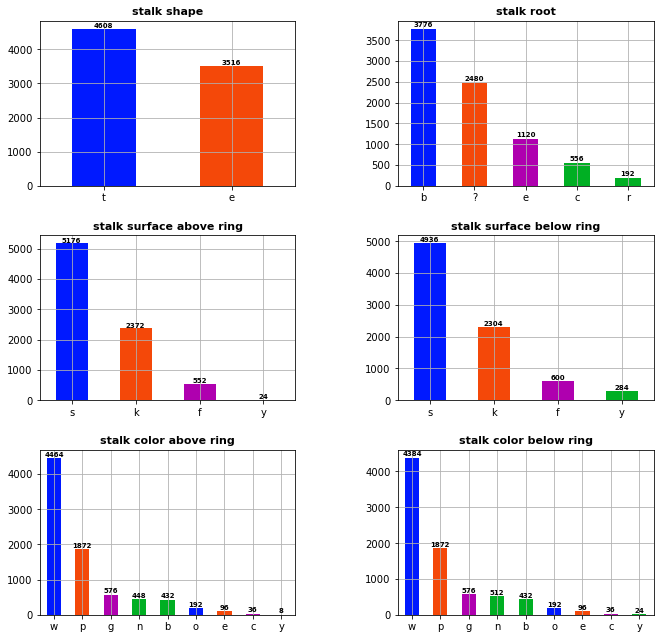

In [4]:
def graph(name, u):
    data[name].value_counts().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.grid(True)
    u.set_title(name.replace("-"," "), fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=7, fontweight="bold")

###############################################################################
# EXPLORATORY DATA ANALYSIS

fig2, ax2 = plt.subplots(3,2, figsize=(11, 10), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#0019ff","#f44809","#af00af","#00af23","#00af23"]

graph("stalk-shape",ax2[0,0])
graph("stalk-root",ax2[0,1])
graph("stalk-surface-above-ring",ax2[1,0])
graph("stalk-surface-below-ring",ax2[1,1])
graph("stalk-color-above-ring",ax2[2,0])
graph("stalk-color-below-ring",ax2[2,1])
plt.rcParams['axes.axisbelow'] = True

**Data have to be encoded for classification. One-hot-encoding with pandas_get_dummies() will be performed. Binary labels will be encoded using sklearn LabelEncoder().**

In [5]:
X = data.drop(["class"], axis=1)
y = data["class"]
X = pd.get_dummies(X)

le = LabelEncoder()
y = le.fit_transform(y)

**Classification and metrics for logistic regression classifier**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 1.0
Recall score is: 1.0
Precision score is: 1.0
F1 score is: 1.0

Confusion matrix:
[[823   0]
 [  0 802]]


**Very good result! Let's check what are the most influential variables. Let's select TOP20 of them.**

Text(0.5, 1.0, 'Classification - TOP20 features (importance)')

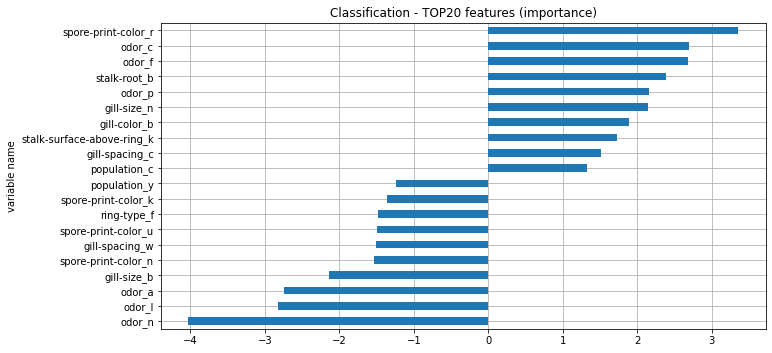

In [7]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

**SMALL EXPERIMENT - let's choose only 4 ARBITRARY variables and see classificator performance **

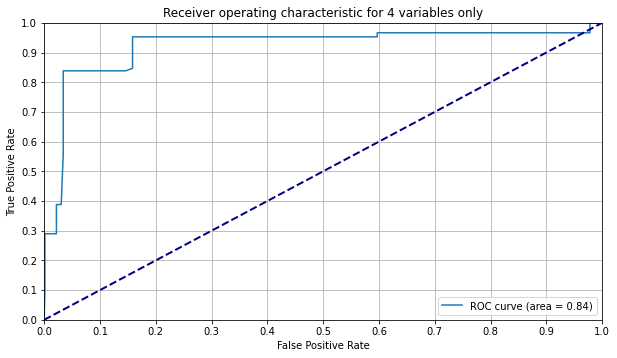

In [8]:
# small experiment - arbitrary selected variables
X2 = data[["bruises","stalk-root","stalk-shape","habitat"]]
X2 = pd.get_dummies(X2)
le = LabelEncoder()
y = le.fit_transform(y)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

clf2 = LogisticRegression(solver="lbfgs").fit(X2_train, y_train)

predicted = clf2.predict(X2_test)

predicted_proba = clf2.predict_proba(X2_test)
predicted_proba = pd.DataFrame(predicted_proba)[1]

roc_auc=roc_auc_score(y_test, predicted)

fpr, tpr, thresholds = roc_curve(y_test, predicted_proba, drop_intermediate=False)

fig2, ax2 = plt.subplots(figsize=(10, 5), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid(True)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([i for i in np.arange(0,1.1,0.1)])
plt.yticks([i for i in np.arange(0,1.1,0.1)])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for 4 variables only')
plt.legend(loc="lower right")

**MORE TO COME**